In [1]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the dataset
df = pd.read_csv("accident.csv", sep = ',')


In [3]:
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [4]:
print(df.isna().sum())

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64


In [5]:
mean=df["Speed_of_Impact"].mean()
 

In [6]:
df["Speed_of_Impact"].fillna(mean, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4104\3290107872.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Speed_of_Impact"].fillna(mean, inplace=True)


In [7]:
df.dropna()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0
...,...,...,...,...,...,...
195,69,Female,111.0,No,Yes,1
196,30,Female,51.0,No,Yes,1
197,58,Male,110.0,No,Yes,1
198,20,Male,103.0,No,Yes,1


In [8]:
label_encoder=LabelEncoder()
df["Gender"]= label_encoder.fit_transform(df["Gender"])
df["Helmet_Used"]= label_encoder.fit_transform(df["Helmet_Used"])
df["Seatbelt_Used"]= label_encoder.fit_transform(df["Seatbelt_Used"])



In [9]:
df

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0
...,...,...,...,...,...,...
195,69,0,111.0,0,1,1
196,30,0,51.0,0,1,1
197,58,1,110.0,0,1,1
198,20,1,103.0,0,1,1


In [10]:

print(df['Survived'].value_counts(normalize=True))

Survived
1    0.505
0    0.495
Name: proportion, dtype: float64


In [11]:

X = df.drop(["Survived"],axis=1) 
y = df["Survived"].values  


# Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initializing the logistic regression model
model = LogisticRegression()


# Training the model
model.fit(X_train, y_train)

# Predicting survival on the test set
y_pred = model.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


# Making predictions for new cases
new_cases = np.array([
    [40,1,100,0,0],  
    [90,0,56,0,1]   
])
predictions = model.predict(new_cases)
print(f"Predicted : {predictions}")



Model Accuracy: 0.68
Predicted : [1 1]


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


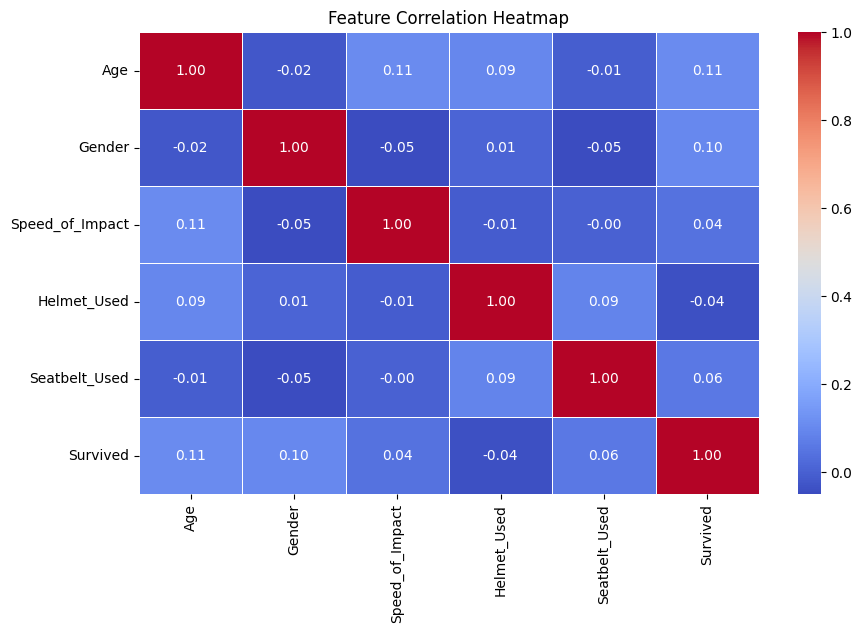

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
